<a href="https://colab.research.google.com/github/Percy-O/Sentiment-Analysis/blob/main/Sentiment_Machine_Learning_Aproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from textblob import TextBlob
%matplotlib inline

warnings.filterwarnings('ignore')

### Loading Datasets

In [ ]:
df_data = pd.read_csv('drive/MyDrive/sentiment/dataplan.csv')
df_data.head()

,Tweet,Analysis
0,Hello . Ou data plans have been designed t...,Neutral
1,Hello . Kindly dial *127*02*phone number # ...,Strong
2,"Hello , I am sorry to hear this and for the...",Strong
3,I bought mtn 6gb for 1500 weekly you Guy's ...,Weak
4,I bought mtn 6gb for 1500 weekly you Guy's ...,Weak


In [ ]:
df_tarrif = pd.read_csv('drive/MyDrive/sentiment/tarrifplan.csv')
df_tarrif.head()

,Tweet,Analysis
0,Yet to rectify my 2year old migration problem...,Strong
1,Pls i want to migrate to airtel tarrif plan w...,Neutral
2,Pls let me know the best tarrif plan for glo...,Very Strong
3,So I have been using my airtime to call your...,Strong
4,"Yeahh it got resolved the day after,please ...",Neutral


In [ ]:
df_customer = pd.read_csv('drive/MyDrive/sentiment/customers.csv')
df_customer.head()

,Tweet,Analysis
0,"Hello , sincere apologies for that content. T...",Strong
1,Glo Unveils Data Roaming Services For Hajj Pil...,Strong
2,Glo unveils data roaming services for Hajj pil...,Strong
3,"Only for me to put my pin I saw ""Airtime purc...",Strong
4,"MTN, Glo, Airtel, and 9mobile stated their fir...",Weak


In [ ]:
df_quality = pd.read_csv('drive/MyDrive/sentiment/qualities.csv')
df_quality.head()

,Tweet,Analysis
0,our quality of service has gone down today bec...,Weak
1,I have nothing against boda Mike but I parted...,Strong
2,"Partially incorrect, I use GLO and it's been ...",Strong
3,"Glo sells the cheapest mobile data, but are no...",Strong
4,Dear \n\nHelp Nigerians.\n\nPlease!\n\nThe Qu...,Weak


In [ ]:
# concat all dataframes into one dataframe
df = pd.concat([df_data,df_tarrif,df_customer,df_quality])
df

,Tweet,Analysis
0,Hello . Ou data plans have been designed t...,Neutral
1,Hello . Kindly dial *127*02*phone number # ...,Strong
2,"Hello , I am sorry to hear this and for the...",Strong
3,I bought mtn 6gb for 1500 weekly you Guy's ...,Weak
4,I bought mtn 6gb for 1500 weekly you Guy's ...,Weak
...,...,...
258,it's called quality of service qos scheduling...,Neutral
259,dy just wastin money on advert instead of beta...,Neutral
260,I'll remind u when u start cursing gloRT : Qua...,Neutral
261,Quality of service RT : MTN n Glo...wats d dif...,Neutral


### Change Category data into numerical data

In [ ]:
map_data = {
    'Weak':0,
    'Very Weak':1,
    'Neutral':2,
    'Strong':3,
    'Very Strong':4,
}

df['Analysis']= df['Analysis'].map(map_data)

In [ ]:
df

,Tweet,Analysis
0,Hello . Ou data plans have been designed t...,2
1,Hello . Kindly dial *127*02*phone number # ...,3
2,"Hello , I am sorry to hear this and for the...",3
3,I bought mtn 6gb for 1500 weekly you Guy's ...,0
4,I bought mtn 6gb for 1500 weekly you Guy's ...,0
...,...,...
258,it's called quality of service qos scheduling...,2
259,dy just wastin money on advert instead of beta...,2
260,I'll remind u when u start cursing gloRT : Qua...,2
261,Quality of service RT : MTN n Glo...wats d dif...,2


### Preprocessing data

In [ ]:
# removing patterns in the input text
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
    # input_txt = re.sub(r'\W+',' ',text)
  return input_txt

In [ ]:
# Remove twitter handles (user)
df['Tweet'] = np.vectorize(remove_pattern)(df['Tweet'],"@[\w]*")

In [ ]:
df

,Tweet,Analysis
0,Hello . Ou data plans have been designed t...,2
1,Hello . Kindly dial *127*02*phone number # ...,3
2,"Hello , I am sorry to hear this and for the...",3
3,I bought mtn 6gb for 1500 weekly you Guy's ...,0
4,I bought mtn 6gb for 1500 weekly you Guy's ...,0
...,...,...
258,it's called quality of service qos scheduling...,2
259,dy just wastin money on advert instead of beta...,2
260,I'll remind u when u start cursing gloRT : Qua...,2
261,Quality of service RT : MTN n Glo...wats d dif...,2


In [ ]:
# Remove special characters,numbers and punctuation
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]', " ")
df.head()

,Tweet,Analysis
0,Hello Ou data plans have been designed t...,2
1,Hello Kindly dial phone number # ...,3
2,Hello I am sorry to hear this and for the...,3
3,I bought mtn gb for weekly you Guy s ...,0
4,I bought mtn gb for weekly you Guy s ...,0


In [ ]:
# Remove short words

df['Tweet'] = df['Tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

In [ ]:
# Split those word into tokens

tokenized_tweet = df['Tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [Hello, data, plans, have, been, designed, sat...
1    [Hello, Kindly, dial, phone, number, unshare, ...
2    [Hello, sorry, hear, this, delayed, response, ...
3    [bought, weekly, debited, money, receive, data...
4    [bought, weekly, debited, money, receive, data...
Name: Tweet, dtype: object

In [ ]:
# Stem the word
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [hello, data, plan, have, been, design, satisf...
1    [hello, kindli, dial, phone, number, unshar, p...
2    [hello, sorri, hear, thi, delay, respons, data...
3    [bought, weekli, debit, money, receiv, data, w...
4    [bought, weekli, debit, money, receiv, data, w...
Name: Tweet, dtype: object

In [ ]:
# Join the tokenized sentences into single strings/ combine it into a sentence
def join_sentences(words):
    return " ".join(words)

tokenized_tweet = tokenized_tweet.apply(join_sentences)

# Update the 'Tweet' column in the DataFrame
df['Tweet'] = tokenized_tweet

# Display the DataFrame
df

                                                 Tweet  Analysis
0    hello data plan have been design satisfi custo...         2
1    hello kindli dial phone number unshar pleas no...         3
2    hello sorri hear thi delay respons data plan g...         3
3    bought weekli debit money receiv data when cal...         0
4    bought weekli debit money receiv data when cal...         0
..                                                 ...       ...
258  call qualiti servic schedul traffic shape ever...         2
259  just wastin money advert instead beta qualiti ...         2
260  remind when start curs glort qualiti servic wa...         2
261         qualiti servic wat differ stroll with http         2
262  logo design compani recogn qualiti servic desi...         2

[1552 rows x 2 columns]


In [ ]:
# # Convert lists of words back to strings
# for i in range(len(tokenized_tweet)):
#     tokenized_tweet[i] = " ".join(tokenized_tweet[i])

# # Update the 'Tweet' column in the DataFrame
# df['Tweet'] = tokenized_tweet
# df

### Exploratory Data Analysis

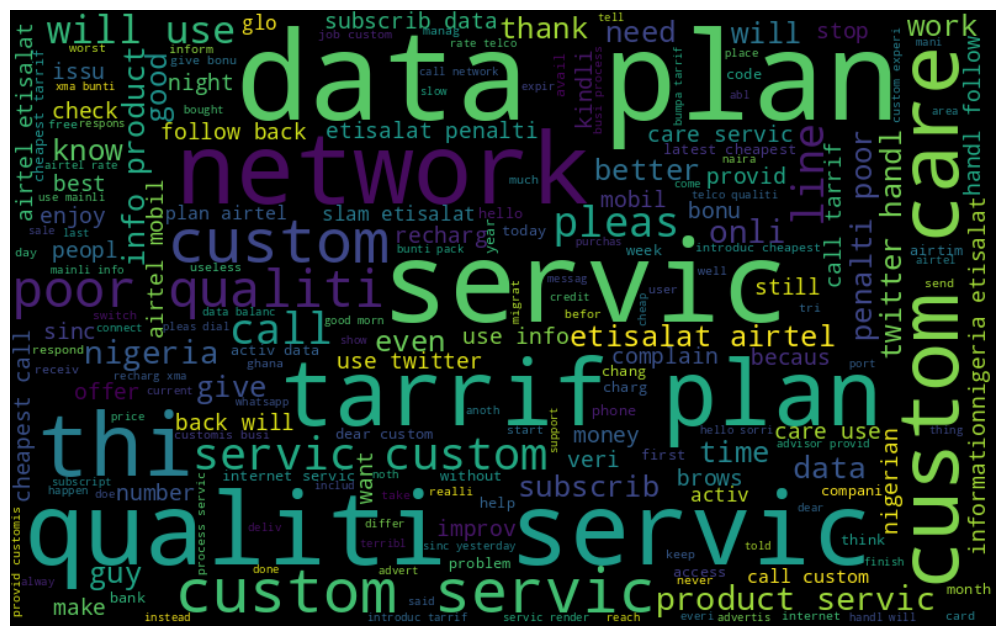

In [ ]:
# Visualize the frequent words
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['Tweet']])
wordcloud = WordCloud(width=800,height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

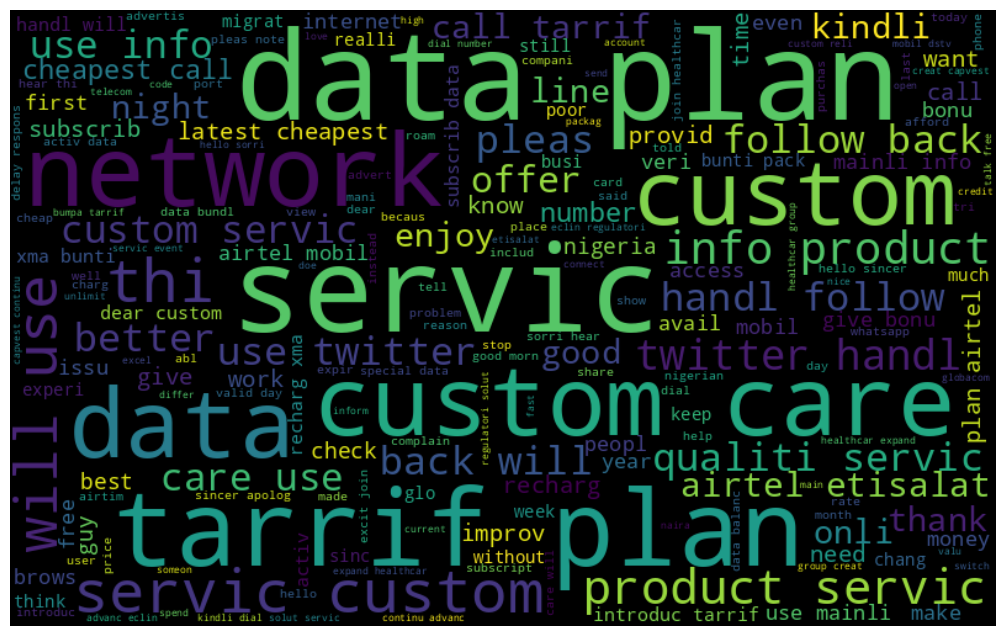

In [ ]:
# Visualize plot for frequent word on customer comment that are STRONG

# Visualize the frequent words
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['Tweet'][df['Analysis']==3]])
wordcloud = WordCloud(width=800,height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

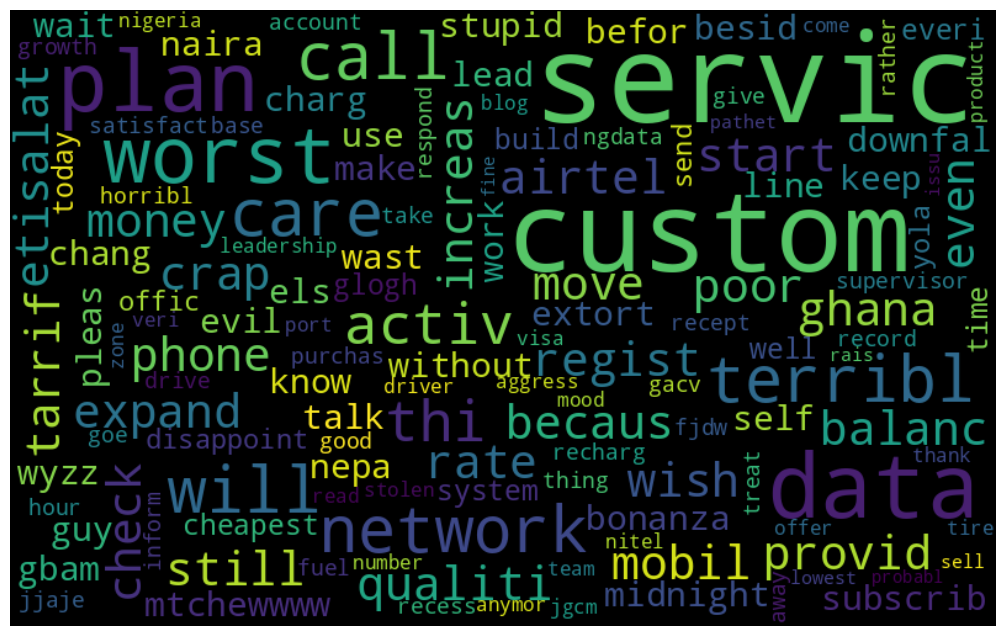

In [ ]:
# Visualize plot for frequent word on customer comment that are WEAK

# Visualize the frequent words
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['Tweet'][df['Analysis']==1]])
wordcloud = WordCloud(width=800,height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Feature Extraction

In [ ]:
# Features Extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.90,min_df=2,stop_words='english')
# cv = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
# cv = CountVectorizer(stop_words='english')
tweet_cv = cv.fit_transform(df['Tweet'])

### Data Split

In [ ]:
from sklearn.model_selection import train_test_split
x = tweet_cv
y= df['Analysis']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### Metrics Function

In [ ]:
from sklearn.metrics import f1_score, classification_report,\
                            accuracy_score,recall_score,precision_score

def metrics(y_test,y_pred):
  print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
  print('Precision score: ', format(precision_score(y_test, y_pred,average='macro')) )
  print('Recall score: ', format(recall_score(y_test, y_pred,average='macro')))
  print('F1 score: ', format(f1_score(y_test, y_pred,average='macro')))
  print('Classification Report: \n', format(classification_report(y_test, y_pred)))

## Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
metrics(y_test,y_pred)

Accuracy score:  0.7145922746781116
Precision score:  0.6052175927117378
Recall score:  0.5613823857302118
F1 score:  0.5779692161110873
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       135
           1       0.00      0.00      0.00         3
           2       0.60      0.70      0.65       115
           3       0.77      0.77      0.77       195
           4       0.92      0.67      0.77        18

    accuracy                           0.71       466
   macro avg       0.61      0.56      0.58       466
weighted avg       0.72      0.71      0.71       466



#### Naive Bayse

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(x_test)
metrics(y_test,y_pred)

Accuracy score:  0.6545064377682404
Precision score:  0.38840090090090096
Recall score:  0.39978694413477023
F1 score:  0.39230255706342093
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       135
           1       0.00      0.00      0.00         3
           2       0.60      0.50      0.55       115
           3       0.66      0.75      0.71       195
           4       0.00      0.00      0.00        18

    accuracy                           0.65       466
   macro avg       0.39      0.40      0.39       466
weighted avg       0.62      0.65      0.64       466



#### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)
metrics(y_test,y_pred)

Accuracy score:  0.7360515021459227
Precision score:  0.7261503081175211
Recall score:  0.6561848135761179
F1 score:  0.6804581891057006
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       135
           1       0.50      0.33      0.40         3
           2       0.60      0.82      0.69       115
           3       0.80      0.75      0.77       195
           4       0.93      0.72      0.81        18

    accuracy                           0.74       466
   macro avg       0.73      0.66      0.68       466
weighted avg       0.75      0.74      0.74       466



#### Support Vector Machine

In [ ]:
sm = SVC()
sm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = sm.predict(x_test)
metrics(y_test,y_pred)

Accuracy score:  0.6781115879828327
Precision score:  0.4227887865955098
Recall score:  0.41691564474173165
F1 score:  0.4085959035624856
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.51      0.64       135
           1       0.00      0.00      0.00         3
           2       0.61      0.75      0.67       115
           3       0.66      0.83      0.74       195
           4       0.00      0.00      0.00        18

    accuracy                           0.68       466
   macro avg       0.42      0.42      0.41       466
weighted avg       0.67      0.68      0.66       466

